Heart Disease in Cleveland
=====
**An analysis by Group 20 DSCI 100 007**

Phoebe McNair-Luxon, Alexandre Beauchemin, Kumaravendhan Ravichandran, Evi Dorsch

Data set source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
library(tidyverse)
library(tidymodels)
library(repr) 
library(gridExtra)
library(readxl)
set.seed(4200)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Part 1: Preliminary Data Analysis
-----
Cell 1: Summary of the data set

Cell 2: Visuization of the data set

In [2]:
# read in data 
Cl_heart_data <- read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", sep = ",",
                 col.names = c("age", "sex", "cp", "trestbps", "chol", "fbs",  "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))


#select for columns 
clean_heart_data <- Cl_heart_data |>
    select("age", "sex", "trestbps", "chol", "fbs", "oldpeak", "num")


#splitting data into training and testing sets
heart_data_split <-  initial_split(clean_heart_data, prop = 0.75, strata = num)
heart_train <- training(heart_data_split)
heart_test <- testing(heart_data_split)
# head(heart_train)
# head(heart_test)

# visualizing the data (only training data)
names <- c("Mean", "Median")
mean <- heart_train |>
    map_df(mean, na.rm = TRUE)
median <- heart_train |>
    map_df(median, na.rm = TRUE)
tbl1 <- bind_rows(mean, median)# , count)
exploratory_analysis <- bind_cols(names, tbl1)
exploratory_analysis

number_of_rows <- heart_train |>  
    nrow()
number_of_rows

New names:
• `` -> `...1`


...1,age,sex,trestbps,chol,fbs,oldpeak,num
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,54.72444,0.68,132.3822,247.6489,0.1377778,1.075111,0.9511111
Median,56.00000,1.00,130.0000,244.0000,0.0000000,0.800000,0.0000000


[1] 225

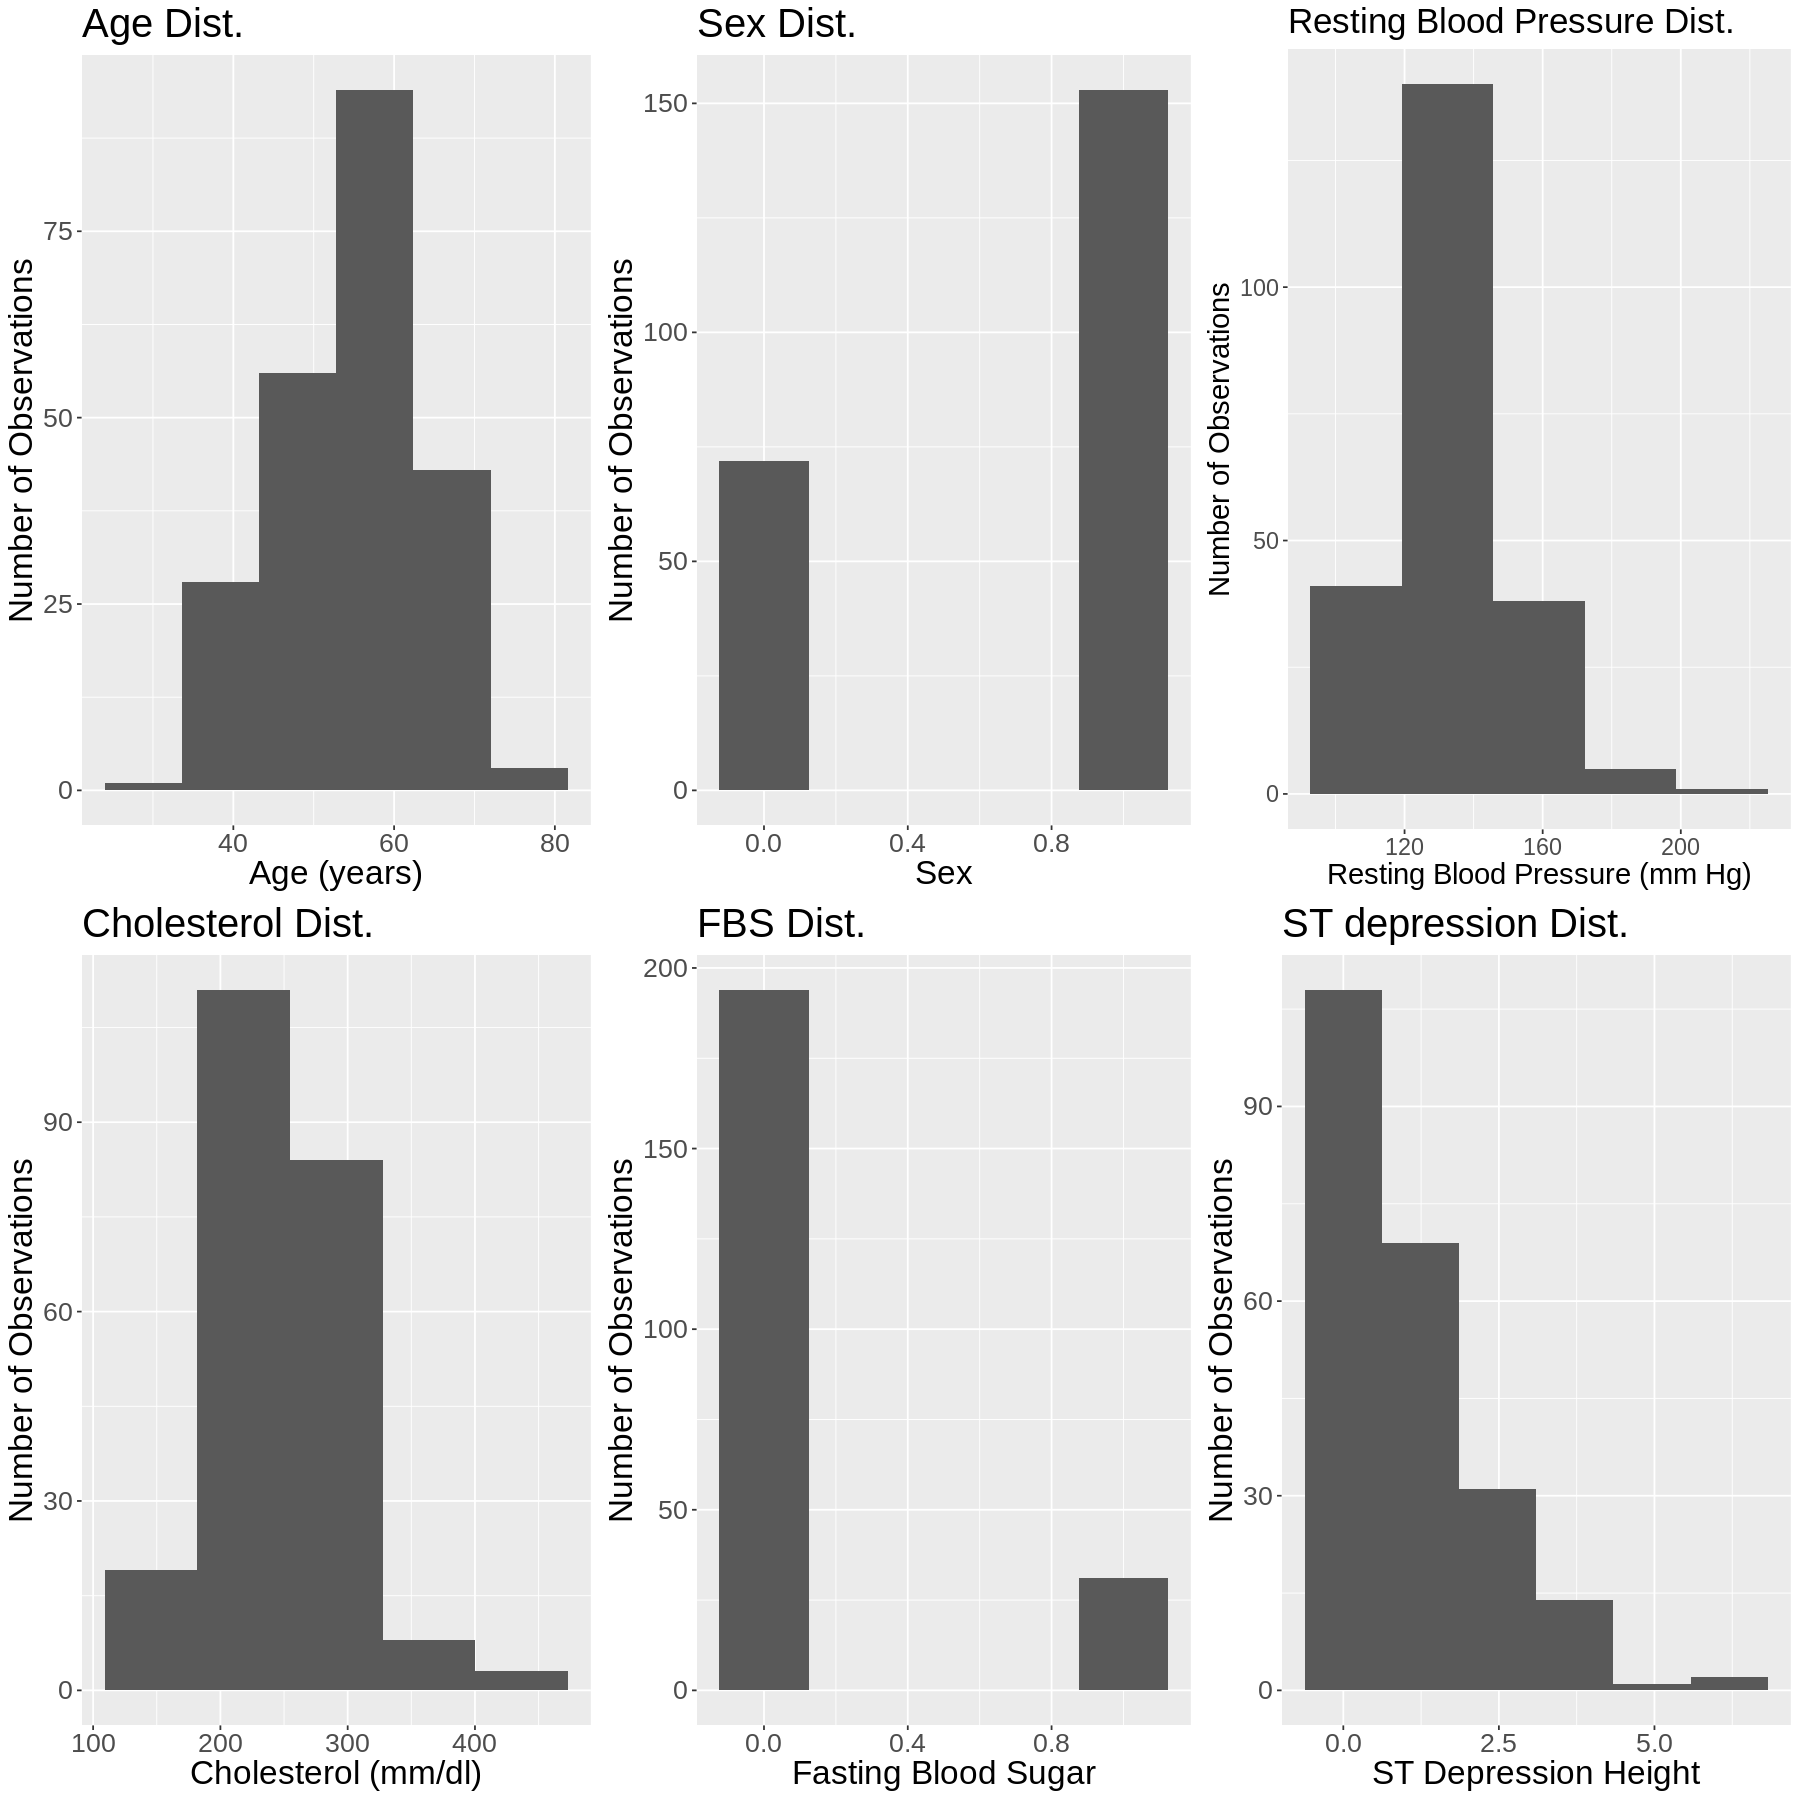

In [3]:
options(repr.plot.height = 15, repr.plot.width = 15)

# Visulize data distribution in a graph
age_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 6, aes(x=age)) +
    labs(x="Age (years)",y = "Number of Observations") +
    ggtitle("Age Dist.") +
    theme(text=element_text(size=20))

sex_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 5, aes(x=sex)) +
    labs(x="Sex",y = "Number of Observations") +
    ggtitle("Sex Dist.") +
    theme(text=element_text(size=20))

trestbps_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 5,aes(x=trestbps)) +
    labs(x="Resting Blood Pressure (mm Hg)",y = "Number of Observations") + 
    ggtitle("Resting Blood Pressure Dist.") +
    theme(text=element_text(size=17.5))

chol_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 5,aes(x=chol)) +
    labs(x="Cholesterol (mm/dl)",y = "Number of Observations") +
    ggtitle("Cholesterol Dist.")+
    theme(text=element_text(size=20))

fbs_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 5 ,aes(x=fbs)) +
    labs(x="Fasting Blood Sugar",y = "Number of Observations") +
    ggtitle("FBS Dist.") +
    theme(text=element_text(size=20))

oldpeak_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 6,aes(x=oldpeak)) +
    labs(x="ST Depression Height",y = "Number of Observations") +
    ggtitle("ST depression Dist.") +
    theme(text=element_text(size=20))

#arrange all graphs to print together
grid.arrange(age_distribution,sex_distribution,trestbps_distribution, chol_distribution,
             fbs_distribution, oldpeak_distribution, ncol =3)

Part 2: Running the Analysis
------
Cell 1: Running the Analysis 

Cell 2: Visulizing the Analysis

In [4]:
# #Analysis with just Census Data

In [5]:
#Analysis with just Medical Data

In [6]:
#Analysis with all Paremeters

heart_train_all <- heart_train |>
    select("age", "sex", "trestbps", "chol", "fbs", "oldpeak", "num")

#make recipe with tune() function
heart_recipe_all <- recipe(num ~ ., data = heart_train_all) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

#make a vfold
heart_vfold_all <- vfold_cv(heart_train_all, v =5, strata = num)

#make a tuning spec 
heart_spec_tune_all <- nearest_neighbor(weight_func = "rectangular", 
                                   neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# make tibble of K values to try 
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

#collect metrics 
heart_workflow_all <- workflow() |>
       add_recipe(heart_recipe_all) |>
       add_model(heart_spec_tune_all)|>
       tune_grid(resamples = heart_vfold_all, grid = k_vals) 

accuracies_all <- heart_workflow_all |>
       collect_metrics() |> #sum of the SD and the mean 
       filter(.metric == "accuracy")
accuracies_all

#plot the accuracies
accuracy_vs_k_all <- ggplot(accuracies, aes(x = neighbors, y= mean)) +
       geom_point() +
       geom_line() +
      labs(x= "Neighbors", y = "Accuracy Estimation")
accuracy_vs_k_all

x Fold1: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a classification model, the outcome should be a factor.

x Fold2: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a classification model, the outcome should be a factor.

x Fold3: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a classification model, the outcome should be a factor.

x Fold4: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a classification model, the outcome should be a factor.

x Fold5: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a classification model, the outcome should be a factor.

Warning message:
“All models failed. Run `show_notes(.Last.tune.result)` for more information.”


ERROR: [1m[33mError[39m in [1m[1m`estimate_tune_results()`:[22m
[33m![39m All of the models failed. See the .notes column.
